### Almost all the material is from http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Series is like a normal list.

In [177]:
# create a Series with an arbitrary list
s = pd.Series([7, 'AmarAkbar', 3.14, -1789710578, 'Sholay'])
s

0              7
1      AmarAkbar
2           3.14
3    -1789710578
4         Sholay
dtype: object

## Can use a index to refer to row names (like a dictionary).

In [126]:
s = pd.Series([7, 'AmarAkbar', 3.14, -1789710578, 'Sholay'],
              index=['int', 'Movie1', 'Pi', 'LongInt', 'Movie2'])
s

int                  7
Movie1       AmarAkbar
Pi                3.14
LongInt    -1789710578
Movie2          Sholay
dtype: object

In [128]:
print(s['Movie1'])

AmarAkbar


## To create a Series, can use a dictionary.

In [130]:
d = {'Ahmedabad': 1000, 'Kolkata': 1300, 'Mumbai': 900, 'Chennai': 1100,
     'Delhi': 450, 'Jaipur': None}
#print (type(d))
cities = pd.Series(d)
cities

Ahmedabad    1000.0
Kolkata      1300.0
Mumbai        900.0
Chennai      1100.0
Delhi         450.0
Jaipur          NaN
dtype: float64

## To refer to specific rows, can use the index or use boolean indexing

In [43]:
cities['Kolkata']

1300.0

In [135]:
a = cities[['Mumbai', 'Kolkata']]
print(a)

Mumbai      900.0
Kolkata    1300.0
dtype: float64


In [137]:
a['Mumbai'] = 10000
print(a)

Mumbai     10000.0
Kolkata     1300.0
dtype: float64


In [138]:
cities['Mumbai']

900.0

In [140]:
cities.iloc[0:5]

Ahmedabad    1000.0
Kolkata      1300.0
Mumbai        900.0
Chennai      1100.0
Delhi         450.0
dtype: float64

In [45]:
cities[[True, False, False,True, False,True]]

Ahmedabad    1000.0
Chennai      1100.0
Jaipur          NaN
dtype: float64

In [148]:
a = cities[cities >= 1000]
b = a[ a <= 1200]
print(b)

Ahmedabad    1000.0
Chennai      1100.0
dtype: float64


## Changing the values in a Series is easy

In [149]:
# changing based on the index
print('Old value:', cities['Ahmedabad'])
cities['Ahmedabad'] = 1400
print('New value:', cities['Ahmedabad'])

Old value: 1000.0
New value: 1400.0


In [152]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

#newindex = ['AMD', 'CCU', 'MUM', 'CHE', 'DEL', 'JAI']
#cities.reindex(newindex)
print(cities[cities < 1000])

Mumbai    750.0
Delhi     750.0
dtype: float64


Mumbai    750.0
Delhi     750.0
dtype: float64


### Checking whether a index value is in Series is similar to regular python

In [49]:
print('San Francisco' in cities)
print('Kolkata' in cities)

False
True


### Operations can be done directly on Series

In [154]:
cities = cities * 0.5
print(cities)

Ahmedabad    350.0
Kolkata      325.0
Mumbai       187.5
Chennai      275.0
Delhi        187.5
Jaipur         NaN
dtype: float64


In [156]:
# square city values
sqcities = np.square(cities)
print(sqcities)

Ahmedabad    122500.00
Kolkata      105625.00
Mumbai        35156.25
Chennai       75625.00
Delhi         35156.25
Jaipur             NaN
dtype: float64


### Adding two Series together?

In [160]:
a = cities[['Ahmedabad','Kolkata']]
print(a)
print("\n")

b = cities[['Jaipur','Kolkata']]
print(b)

c = a + b
print("\n\n---------\n",c)


Ahmedabad    350.0
Kolkata      325.0
dtype: float64


Jaipur       NaN
Kolkata    325.0
dtype: float64


---------
 Ahmedabad      NaN
Jaipur         NaN
Kolkata      650.0
dtype: float64


### None / NULL checking

In [53]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Ahmedabad     True
Kolkata       True
Mumbai        True
Chennai       True
Delhi         True
Jaipur       False
dtype: bool

In [161]:
cities[cities.isnull()] = 0
#print(cities[cities.isnull()])
print(cities)

Ahmedabad    350.0
Kolkata      325.0
Mumbai       187.5
Chennai      275.0
Delhi        187.5
Jaipur         0.0
dtype: float64


# DataFrame

### Reading data: Can be created out of python dictionary

In [167]:
data = {'year': [2010, 2011, 2012, 2011, 2012],
        'team': ['RR', 'CSK', 'KKR', 'KKR', None],
        'wins': [11, 8, 10, 15, 11],
        'losses': [5, 8, 6, 1, 5]}


ipl = pd.DataFrame(data, columns=['team','year', 'wins', 'losses'])
ipl

,team,year,wins,losses
0,RR,2010,11,5
1,CSK,2011,8,8
2,KKR,2012,10,6
3,KKR,2011,15,1
4,None,2012,11,5


In [168]:
% ls *.csv

data-2013.csv  data.csv  datafile.csv  data-new.csv


In [169]:
!head -5 data-new.csv

stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
748,1/3/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4,9,69,NA,"Kamalanagar, Ananthapur",NA,2013-03-01
748,1/6/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4,9,71,NA,"Kamalanagar, Ananthapur",NA,2013-06-01
748,1/9/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4,9,69,NA,"Kamalanagar, Ananthapur",NA,2013-09-01
748,1/12/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4,9,70,NA,"Kamalanagar, Ananthapur",NA,2013-12-01


In [170]:
aqmdata = pd.read_csv('data-new.csv')
aqmdata.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,748,1/3/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,69.0,NaN,"Kamalanagar, Ananthapur",NaN,2013-03-01
1,748,1/6/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,71.0,NaN,"Kamalanagar, Ananthapur",NaN,2013-06-01
2,748,1/9/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,69.0,NaN,"Kamalanagar, Ananthapur",NaN,2013-09-01
3,748,1/12/2013,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,70.0,NaN,"Kamalanagar, Ananthapur",NaN,2013-12-01
4,748,15-01-13,Andhra Pradesh,Ananthapur,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,84.0,NaN,"Kamalanagar, Ananthapur",NaN,2013-01-15


## Data is at https://goo.gl/M6QUSk

### Note that the above file had headers, which were automatically . If we did not want them we should have set headers=False

In [175]:
aqmdata2 =  pd.read_html("https://en.wikipedia.org/wiki/List_of_mobile_telephone_prefixes_by_country", match="Afghanistan")
data = aqmdata2[0]
data.head()



,0,1,2,3,4,5,6
0,Country or unrecognized territory,Interna- tional Calling Code,Mobile Prefix [notes 1],Size of NSN [notes 2],Carrier,Notes,NaN
1,Abkhazia,+7,940,10,NaN,See Russia,NaN
2,+995,44x,9,NaN,See Georgia,NaN,NaN
3,Afghanistan,+93,70,?,AWCC,www.afghan-wireless.com,NaN
4,71,?,AWCC,www.afghan-wireless.com,NaN,NaN,NaN


In [94]:
aqmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29293 entries, 0 to 29292
Data columns (total 13 columns):
stn_code                       29293 non-null object
sampling_date                  29292 non-null object
state                          29292 non-null object
location                       29292 non-null object
agency                         29292 non-null object
type                           29292 non-null object
so2                            27989 non-null float64
no2                            28015 non-null float64
rspm                           28558 non-null float64
spm                            2873 non-null float64
location_monitoring_station    29292 non-null object
pm2_5                          0 non-null float64
date                           29292 non-null object
dtypes: float64(5), object(8)
memory usage: 2.9+ MB


In [176]:
aqmdata.describe()

,so2,no2,rspm,spm,pm2_5
count,27989.000000,28015.000000,28558.000000,2873.000000,0.0
mean,9.509525,20.829251,92.379077,35.759422,NaN
std,8.448074,15.185712,59.818941,45.516603,NaN
min,0.000000,1.000000,1.000000,10.200000,NaN
25%,4.000000,12.000000,52.000000,20.000000,NaN
50%,7.000000,17.000000,78.000000,24.460000,NaN
75%,13.000000,26.000000,117.000000,32.000000,NaN
max,122.000000,239.900000,728.000000,315.000000,NaN


### You can inspect the data, and convert it to other formats

In [95]:
aqmdata.to_excel('aqmdata.xlsx', index=False)

### Getting the frequency of the values

In [97]:
aqmdata['location'].value_counts()

Guwahati              1231
Visakhapatnam          856
Kochi                  754
Chandigarh             740
Hyderabad              736
Bangalore              681
Nashik                 620
Pune                   615
Nagpur                 612
Navi Mumbai            513
Chandrapur             482
Baddi                  447
Thiruvananthapuram     416
Ahmedabad              410
Jalgaon                380
Thane                  313
Sangli                 312
Nanded                 311
Latur                  310
Kala Amb               308
Korba                  303
Aurangabad             301
Parwanoo               295
Vijayawada             290
Damtal                 283
Indore                 277
Kolhapur               275
Shimla                 273
Delhi                  271
Una                    270
                      ... 
Badlapur                97
Bilaspur                96
Nalbari                 95
Tura                    90
Jabalpur                88
Chitradurga             87
M

In [111]:
rspm = aqmdata['rspm'].value_counts()
rspm.iloc[0:10]

59.0    331
53.0    320
60.0    311
61.0    310
57.0    309
63.0    308
52.0    308
55.0    302
56.0    299
58.0    298
Name: rspm, dtype: int64

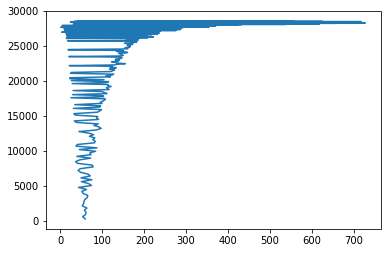

In [113]:
rspmcum = rspm.cumsum()
rspmcum.plot()

In [123]:
rspmhigh = aqmdata[aqmdata['rspm'] > 55]
'Ahmedabad' in rspmhigh

False

In [124]:
rspmhigh['state'].value_counts()

Maharashtra         5325
Andhra Pradesh      2897
Assam               2341
Himachal Pradesh    1890
Karnataka           1501
Gujarat             1402
Madhya Pradesh      1037
Kerala               924
Goa                  696
Chandigarh           615
Chhattisgarh         531
Jharkhand            450
Delhi                269
Jammu & Kashmir      225
Meghalaya            217
Haryana              112
Mizoram               38
Name: state, dtype: int64

In [125]:
rspmhigh['location'].value_counts()

Guwahati          1188
Chandigarh         615
Hyderabad          596
Bangalore          571
Nashik             481
Nagpur             474
Kochi              455
Navi Mumbai        422
Visakhapatnam      418
Pune               412
Jalgaon            365
Ahmedabad          356
Chandrapur         347
Baddi              320
Kala Amb           276
Vijayawada         275
Delhi              269
Thane              269
Surat              267
Kolhapur           265
Una                260
Aurangabad         253
Latur              249
Bhilai             243
Mumbai             240
Jammu              225
Paonta Sahib       224
Amravati           222
Sivasagar          208
Bhopal             203
                  ... 
Bicholim            46
Assanora            44
Honda               43
Shimoga             42
Curchorem           38
Aizawl              38
Ponda               38
Kollam              37
Tilamol             36
Bongaigaon          36
Vizianagaram        36
Panaji              35
Bidar      